# Welter issue #17
## Teff vs order
### Part 2: Make a Table for the multi temps and fill factors

Michael Gully-Santiago  
Monday, June 28, 2016  

See [Issue17](https://github.com/BrownDwarf/welter/issues/17)

In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [8]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [9]:
import pandas as pd

## Retrieve aggregated data for multi-$T_{\rm eff}$ Starfish runs for all spectral orders.

In [10]:
#! head ../data/analysis/IGRINS_mix_emcee_last200.csv

In [11]:
IG_raw = pd.read_csv('../data/analysis/IGRINS_mix_K_Run01_H_Run02.csv')

In [12]:
IG_raw.head()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,Teff2_05p,Teff2_50p,Teff2_95p,logO2_05p,logO2_50p,logO2_95p,ff_05p,ff_50p,ff_95p,inference
0,18092.0,18346.0,H,0,0.117487,98,18219.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17914.0,18165.0,H,1,0.342583,99,18039.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,17739.0,17988.0,H,2,0.666035,100,17863.5,4119.604630,4312.672222,4474.515407,...,2703.707416,2765.367136,2900.392667,-0.058854,0.051357,0.139004,0.734685,0.794156,0.832494,True
3,17568.0,17815.0,H,3,0.827089,101,17691.5,3625.364642,4199.583018,4463.705141,...,2757.251605,2916.251194,3075.061624,-0.382951,-0.004874,0.110811,0.566891,0.792576,0.844624,True
4,17400.0,17645.0,H,4,0.904758,102,17522.5,4176.946167,4336.687926,4473.679807,...,2702.575311,2751.474163,2864.956469,0.029823,0.117106,0.199920,0.772381,0.819419,0.858518,True


It's missing the logOmega2 columns for some reason...

## Plot of $T_{eff}$ vs. spectral order

In [13]:
orders = IG_raw
N_orders = len(orders)

In [14]:
sns.set_style('ticks')

In [15]:
sns.set_context('paper')

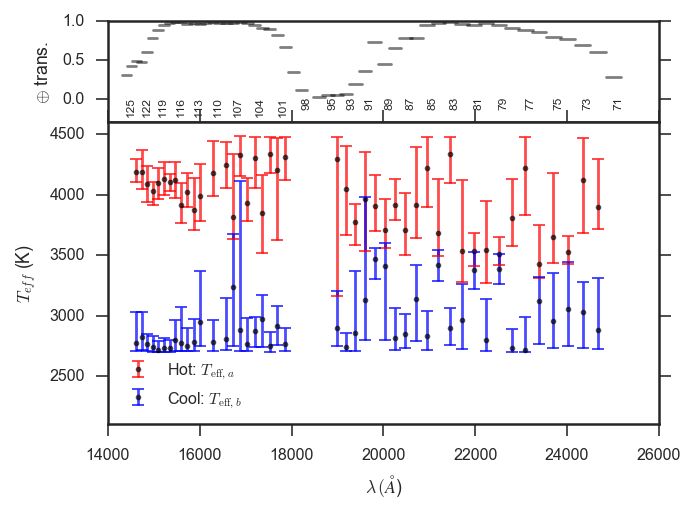

In [18]:
#plt.subplot(211)
fig = plt.figure(figsize=(8.5, 3.5))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.3, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    print_every = 2
    if orders.m_val[i] > 99:
        print_every = 3
    if (orders.number.values[i] % print_every) == 0:
        ax1.text(orders.wl_center[i], -0.07, '{}'.format(orders.m_val.values[i]),
                 fontsize=6, rotation=90)
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.errorbar(orders.wl_center, orders.Teff_50p, 
             yerr=(orders.Teff_50p-orders.Teff_05p,
                  orders.Teff_95p-orders.Teff_50p), ecolor='r', capthick=1,
            fmt='k.', alpha=0.7, label='Hot: $T_{\mathrm{eff}, a}$')
ax.errorbar(orders.wl_center, orders.Teff2_50p,
             yerr=(orders.Teff2_50p-orders.Teff2_05p, 
                  orders.Teff2_95p-orders.Teff2_50p), ecolor='b', capthick=1,
            fmt='k.', alpha=0.7, label='Cool: $T_{\mathrm{eff}, b}$')


ax.set_ylim(2100, 4600)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='lower left')
plt.savefig('../document/figures/LkCa4_HK_mixTeff_by_order.pdf', bbox_inches='tight')

In [19]:
vals = orders.Teff2_50p == orders.Teff2_50p
vals.sum()

46

In [20]:
len(orders)

54

## Add multi-Teff rows to the Latex Table of $T_{\rm eff}$ vs. order.

In [21]:
latex_out = pd.read_csv('../data/analysis/latex_TeffOrder_table.csv')

In [22]:
latex_new = pd.DataFrame()

In [23]:
latex_out.tail()

,Order,Instrument,wavelength_range,Teff,Teff1,Teff2,f
53,80,IGRINS,22085$-$22393,$3157^{+132}_{-124}$,NaN,NaN,NaN
54,79,IGRINS,22360$-$22671,$3437^{+79}_{-60}$,NaN,NaN,NaN
55,78,IGRINS,22643$-$22957,$3197^{+43}_{-43}$,NaN,NaN,NaN
56,77,IGRINS,22932$-$23251,$3273^{+52}_{-49}$,NaN,NaN,NaN
57,76,IGRINS,23230$-$23552,$3321^{+54}_{-53}$,NaN,NaN,NaN


### Merge single and double results

In [24]:
finite_orders = orders[orders.Teff_50p == orders.Teff_50p]

In [25]:
fo = finite_orders.sort_values('wl_center')

In [26]:
latex_new['Order'] = fo.m_val

In [27]:
fo['plus_error1'] = fo.Teff_95p-fo.Teff_50p
fo['minus_error1'] = fo.Teff_50p-fo.Teff_05p
fo['plus_error2'] = fo.Teff2_95p-fo.Teff2_50p
fo['minus_error2'] = fo.Teff2_50p-fo.Teff2_05p
fo['f_plus_error'] = fo.ff_95p-fo.ff_50p
fo['f_minus_error'] = fo.ff_50p-fo.ff_05p

In [28]:
latex_new['Teff1'] = ('$'+fo.Teff_50p.apply(lambda x:"{}".format(int(x)))+'^{+'+
                     fo.plus_error1.apply(lambda x:"{}".format(int(x)))+'}_{-'+
                     fo.minus_error1.apply(lambda x:"{}".format(int(x)))+'}$')

In [29]:
latex_new['Teff2'] = ('$'+fo.Teff2_50p.apply(lambda x:"{}".format(int(x)))+'^{+'+
                     fo.plus_error2.apply(lambda x:"{}".format(int(x)))+'}_{-'+
                     fo.minus_error2.apply(lambda x:"{}".format(int(x)))+'}$')

In [30]:
latex_new['ff'] = ('$'+fo.ff_50p.apply(lambda x:"{:0.2f}".format(x))+'^{+'+
                     fo.f_plus_error.apply(lambda x:"{:0.2f}".format(x))+'}_{-'+
                     fo.f_minus_error.apply(lambda x:"{:0.2f}".format(x))+'}$')

In [31]:
fo['wavelength_range'] = (fo.wl_start.apply(lambda x:"{}".format(int(np.floor(x))))+'$-$'+
       fo.wl_end.apply(lambda x:"{}".format(int(np.ceil(x)))))

In [32]:
latex_new['wavelength_range'] = fo.wavelength_range

In [33]:
latex_merge = pd.merge(latex_out.drop(['Teff1', 'Teff2', 'f'], axis=1), latex_new, how='outer', on='Order')

In [34]:
latex_merge.Order = latex_merge.Order.astype(int)

There's some missing data.  We only added IGRINS data, and the wavelength ranges are the same.

In [35]:
latex_merge.Instrument[latex_merge.Instrument!=latex_merge.Instrument] = 'IGRINS'

In [36]:
bi = latex_merge.wavelength_range_x != latex_merge.wavelength_range_x
latex_merge.wavelength_range_x[bi] = latex_merge.wavelength_range_y[bi]

In [37]:
latex_merge = latex_merge.rename(columns={"wavelength_range_x":"wavelength_range"}).drop(['wavelength_range_y'], axis=1)

Sort by wavelength.

In [38]:
columns_in_order = latex_merge.columns
igr = latex_merge.Instrument == 'IGRINS'
esp = latex_merge.Instrument == 'ESPaDoNs'
latex_merge = pd.concat([latex_merge[esp], 
           pd.merge(latex_merge[igr], fo[['wl_center', 'm_val']],
                    how='outer', left_on="Order", right_on="m_val"
                   ).sort_values("wl_center")]
         ).drop(['m_val', 'wl_center'], axis=1)[columns_in_order].reset_index(drop=True)

In [39]:
latex_merge.fillna(value='$\cdots$')[43:50]

,Order,Instrument,wavelength_range,Teff,Teff1,Teff2,ff
43,105,IGRINS,16917$-$17155,$<3711$,$3930^{+209}_{-152}$,$2763^{+212}_{-59}$,$0.66^{+0.06}_{-0.10}$
44,104,IGRINS,17075$-$17315,$<3776$,$4300^{+177}_{-245}$,$2870^{+115}_{-130}$,$0.83^{+0.05}_{-0.05}$
45,103,IGRINS,17236$-$17478,$<3700$,$3848^{+312}_{-334}$,$2972^{+199}_{-234}$,$0.65^{+0.18}_{-0.30}$
46,102,IGRINS,17400$-$17645,$<3629$,$4336^{+136}_{-159}$,$2751^{+113}_{-48}$,$0.82^{+0.04}_{-0.05}$
47,101,IGRINS,17568$-$17815,$<3543$,$4199^{+264}_{-574}$,$2916^{+158}_{-158}$,$0.79^{+0.05}_{-0.23}$
48,100,IGRINS,17739$-$17988,$<3598$,$4312^{+161}_{-193}$,$2765^{+135}_{-61}$,$0.79^{+0.04}_{-0.06}$
49,94,IGRINS,18855$-$19117,$\cdots$,$4293^{+185}_{-1132}$,$2899^{+304}_{-150}$,$0.81^{+0.07}_{-0.39}$


In [40]:
latex_merge.to_latex('../document/tables/tbl_order_results_all_raw.tex', na_rep='$\cdots$', index=False, escape=False)

## The end.